<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

   Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0    1     41.0   49600.0            1                  0
1    0     46.0   38000.0            1                  1
2    0     29.0   21000.0            0                  0
3    0     21.0   41700.0            2                  0
4    1     28.0   26100.0            0                  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1

,Пол,Возраст,Зарплата,Члены семьи
Пол,1.000000,0.002074,0.014910,-0.008991
Возраст,0.002074,1.000000,-0.019093,-0.006692
Зарплата,0.014910,-0.019093,1.000000,-0.030296
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000



Дубликаты: 153

Кол-во дубликатов после удаления: 0


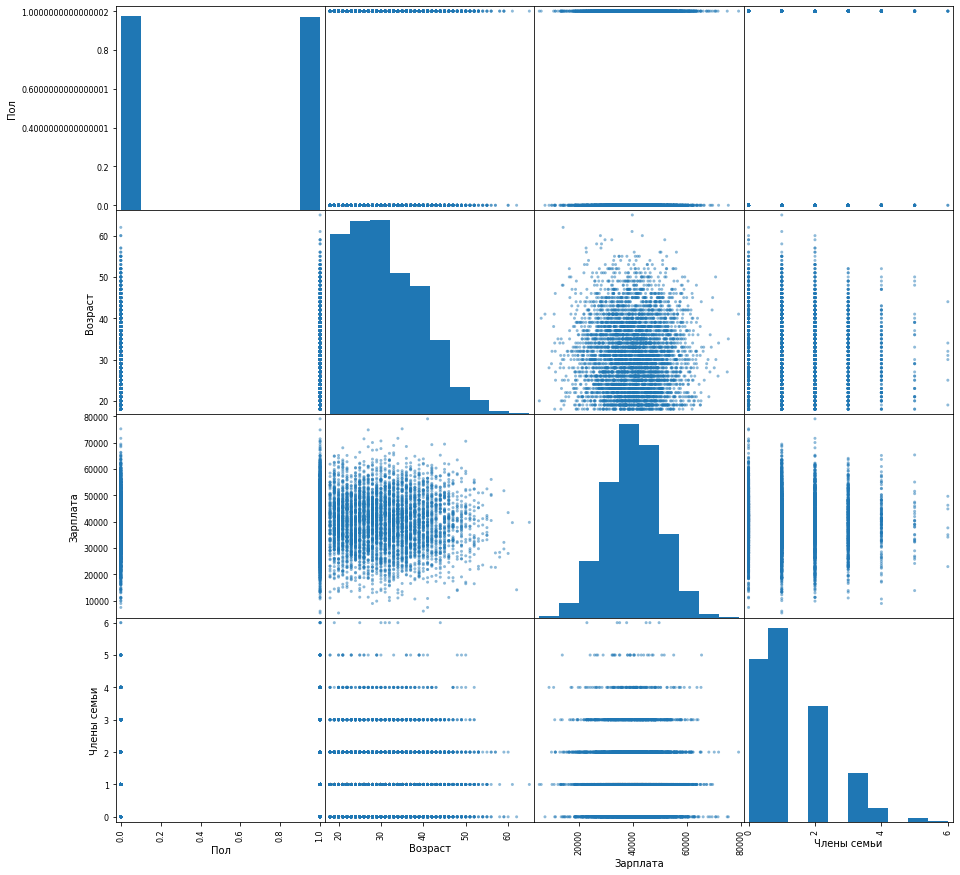

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

print(df.head())

df.info()

print(df.describe())

# Проверка на корреляцию
display(df[['Пол','Возраст','Зарплата','Члены семьи']].corr())

# Проверка на дубликаты - check 1
print()
print('Дубликаты:',df.duplicated().sum())

# Удаление дубликатов
df = df.drop_duplicates().reset_index(drop = True)

# Проверка на дубликаты - check 2
print()
print('Кол-во дубликатов после удаления:',df.duplicated().sum())

# Смотрим на распределения данных на scatterplot matrix
pd.plotting.scatter_matrix(df[['Пол','Возраст','Зарплата','Члены семьи']], figsize=(15, 15))
plt.show()

**Вывод:**
В датафрейме 5 колонок и 5000 строк, пропуски не обнаружены, но было найдено 153 дубликата (удалено с помощью метода .drop_duplicates()). В данных не обнаружено признаков с высокой корреляцией, поэтому оставляем все столбцы. На scatterplot matrix по диагонали можно увидеть каждую из колонок выраженной в графике. Графики признаков "Возраст" и "Члены семьи скошены вправо, "Зарплата" имеет нормальное распределение, "Пол" имеет всего две переменных 1 и 0, выражающие женский и мужской пол. 

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если умножить признаки на обратимую матрицу, то качество линейной регрессии не изменится.

**Обоснование:** Согласно законам линейной алгебры, обратная матрица должна быть квадратной и детерминант (в формуле подсчета обратной матрицы $ (1 / (ad-bc)) * [\begin{matrix} d & -b \\ -c & a \end{matrix}$] ) не должен равняться 0. Для матрицы $А$, перемножение ее на обратимую матрицу $(A^{-1})$ будет равняться единичной матрице ($I$). 

$$
A*A^{-1}=A^{-1} * A = I
$$

При умножении матрицы $I$ на матрицу А получится та же матрица А (идентично умножению на 1 в математике):

$$
I * A = A * I = A
$$

Если сгенерировать случайную матрицу с помощью библиотеки NumPy, вероятность получения необратимой матрицы близка к нулю, поэтому проверим формулы на реальных матрицах: 

In [5]:
# Генерируем случайную матрицу А
matrix_A = np.random.normal(size=(4, 4))
print(matrix_A)

[[ 0.86847035  0.21408306  0.41761591  0.68750985]
 [-0.20672451 -1.50919855  0.38439627  0.11865507]
 [ 0.14250046 -0.62411621 -0.01750515  0.7916309 ]
 [ 1.98500473  0.11385296  0.75548532 -0.12783831]]


In [6]:
# Находим обратную А матрицу (А')
inverse_A = inv(matrix_A)
print(inverse_A)

[[-0.93155994 -0.49028242  1.00974124  0.78780176]
 [ 0.82561996 -0.26852582 -0.73115241 -0.33669833]
 [ 2.47097507  1.31268558 -2.466639   -0.76730654]
 [ 0.87324195 -0.09442164  0.45047312 -0.42422903]]


In [7]:
# Умножаем А на обратную ей матрицу (проверка на обратимость)
I = matrix_A @ inverse_A
print(I)

[[ 1.00000000e+00  1.93247346e-17 -7.25858051e-17 -4.59745259e-18]
 [-2.05879127e-17  1.00000000e+00 -2.56474434e-17 -3.76747263e-18]
 [ 1.10440391e-16 -6.82126635e-17  1.00000000e+00  1.23716453e-17]
 [ 1.05754985e-16 -7.52819947e-17 -1.00484241e-16  1.00000000e+00]]


In [8]:
# Умножаем I на A

back_to_A = I @ matrix_A
print(back_to_A)

[[ 0.86847035  0.21408306  0.41761591  0.68750985]
 [-0.20672451 -1.50919855  0.38439627  0.11865507]
 [ 0.14250046 -0.62411621 -0.01750515  0.7916309 ]
 [ 1.98500473  0.11385296  0.75548532 -0.12783831]]


По условию
$$
w = \arg\min_w MSE(Xw, y)
$$
После умножения на обратную матрицу А, мы получили
$$
w = \arg\min_w MSE(XAw', y)
$$
Нам необходимо доказать или опровергнуть, что 
$$ 
MSE(Xw, y) = MSE(XАw', y)
$$

Как нам известно, формула для обучения модели выглядит так
$$
w = (X^T X)^{-1} X^T y
$$
Перемножив матрицу Х (признаки) на А (обратимая матрица) (для этой формулы, вектор весов обозначим как w', чтобы дифференцировать с предыдущей формулой и решить задачу), мы получим 
$$
w' = ((X*A)^{T} * (X*А))^{-1}*(X*A)^{T}*y
$$

Мы можем упростить это выражение, полагаясь на правило, что $(A*B)^{-1}=B^{-1}*A^{-1}$, где А и В - матрицы. А также держа в уме, что для неквадратных матриц обратных матриц не существует. В итоге получаем

$$
w' = (A^T*(X^T*X)*A)^{-1}*(X*A)^T*y
$$
$$
w' = А^{-1} * (X^TX)^{-1} *(А^T)^{-1} * X^T*А^T
$$
Помним, что $A * A^{-1} = I$. Из этого следует
$$
w' = А^{-1} * (X^TX)^{-1} * X^T * y
$$
По условию
$$
w' = (X^T*X)^{-1}*X^T*y
$$
Из этого следует
$$
w' = A^{-1} * w * y
$$


Из этого можно расчитать, что
$$
MSE(Xw, y) = MSE(XАw, y)
$$
$$
MSE(Xw, y) = MSE(XАA^{-1}w, y)
$$

Снова, $А*А^{-1}=I$, поэтому

$$
MSE(Xw, y) = MSE(XIw, y)
$$
$$
MSE(Xw, y) = MSE(Xw, y)
$$

**Вывод:** Если умножить признаки на обратимую матрицу, то качество линейной регрессии не изменится.

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
....
$$


## Алгоритм преобразования

**Алгоритм**
<br>Сначала обучим модель без преобразования, чтобы иметь опорную точку для сравнения качества модели:
<br>Шаг 1. Определить признаки и целевой признак
<br>Шаг 2. Определить и обучить модель 
<br>Шаг 3. Предсказать значения для признаков 
<br>Шаг 4. Оценить качество модели по MSE

Затем, преобразуем наши данные: 
<br>Шаг 1. Создадим случайную матрицу A с помощью NumPy
<br>Шаг 2. Убедимся, что созданная матрица A обратима
<br>Шаг 3. Умножим матрицу признаков на обратную матрицу A
<br>Шаг 4. Обучим модель
<br>Шаг 5. Предсказать значения для признаков 
<br>Шаг 6. Оценить качество модели по MSE

<br>Шаг 7. Сравнить качество модели после преобразования и до

**Обоснование**

Как и в доказательстве в шаге # 2 в этом проекте, если умножить обратимую матрицу $А$ на обратную ей же ($A^{-1}$), получится единичная матрица $I$. Таким образом можно будет вернуться к исходным данным до тех пор, пока у нас будет доступ к матрице $А$ и пока она обратима. Следовательно, матрица $А$ в данном случае выступает ключом к расшифровке данных.

## Проверка алгоритма

In [3]:
# Обучение модели без преобразования (модель Линейной Регрессии)
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

# Разделение данных на  обучающую и тестовую выборки
#train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.25, random_state=12345)

# Обучаем модель
model = LinearRegression().fit(features, target)

# Строим предсказания для модели
predictions = model.predict(features)

# Оценка качества модели
print('MSE:', mean_squared_error(target, predictions))
print('RMSE:', math.sqrt(mean_squared_error(target, predictions)))


MSE: 0.12527263826681603
RMSE: 0.35393874931521135


In [4]:
# Генерируем случайную матрицу А размерностью с признаками
matrix_A = np.random.normal(size=(features.shape[1], features.shape[1]))
#print(matrix_A)

# Находим обратную А матрицу (А')
inverse_A = inv(matrix_A)
#print(inverse_A)

# Проверяем на обратимость
I = matrix_A @ inverse_A
#print(I)

# Умножаем матрицу признаков на обратную матрицу А
features_new = features.dot(matrix_A)
#display(features_array_encoded)

# Проверка на восстановимость данных
print('Оригинальные данные:')
display(features)
print('Данные после расшифровки:')
display(features_new @ inverse_A)

Оригинальные данные:


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4842,0,28.0,35700.0,2
4843,0,34.0,52400.0,1
4844,0,20.0,33900.0,2
4845,1,22.0,32700.0,3


Данные после расшифровки:


,0,1,2,3
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-8.576318e-12,46.0,38000.0,1.000000e+00
2,-2.576285e-12,29.0,21000.0,-3.440923e-12
3,-6.875169e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-2.488083e-12
...,...,...,...,...
4842,-4.062223e-12,28.0,35700.0,2.000000e+00
4843,-3.205931e-12,34.0,52400.0,1.000000e+00
4844,-6.550890e-12,20.0,33900.0,2.000000e+00
4845,1.000000e+00,22.0,32700.0,3.000000e+00


In [5]:
# Обучаем модель 
model_encoded = LinearRegression().fit(features_new, target)

# Строим предсказания для модели
predictions_encoded = model_encoded.predict(features_new)

# Оценка качества модели
print('MSE:', mean_squared_error(target, predictions_encoded))
print('RMSE:', math.sqrt(mean_squared_error(target, predictions_encoded)))

MSE: 0.12527263826682278
RMSE: 0.3539387493152209


**Вывод**: После обучения моделей до и после шифрования оригинальных данных методом умножения на обратимую матрицу, и сравнениях результатов их RMSE, видно, что RMSE (то есть, качество самой модели) в обеих матрицах одинаково.  Когда мы умножаем наши характеристики на обратимую матрицу, у нас все равно остается та же оценка R2, w0 (intercept), но w (вектор) отличается, потому что мы использовали замаскированные функции для вычисления w (вектора). Алгоритм хорошо работает вручную и со sklearn.